# Approccio bayesiano alla probabilità

Abbiamo visto che, in generale:
    
$\displaystyle P(A|E) = \frac{P(E|A) P(A)}{P(E)}$

O anche, scomponendo il denominatore:

$\displaystyle P(A_i|E) = \frac{P(E|A_i) P(A_i)}{\sum_{i=j}^n P(E|A_j) P(A_j)}$

Finora questi risultati si possono applicare a qualsiasi definizione di probabilità, compreso quella frequentista.

<span style="color: blue">La formula di Bayes consente però di **dare un significato** alla probabilità di $A$ quando $A$ non sia un evento casuale, bensì una **affermazione** che non sappiamo se sia vera o falsa, ma sappiamo che, assumendo che sia vera o falsa, influenza la distribuzione di probabilità di una possibile evidenza $E$.</span>

Possiamo anche parlare di $A$ come una possibile **ipotesi**.

Nel caso della scomposizione, possiamo avere diverse affermazioni $A_i$, ciascuna mutuamente esclusiva. Ossia: se una è vera, tutte le altre saranno false. Almeno una, quindi una ed una sola, delle $n$ $A_i$ deve essere vera. Ma, in generale, non sappiamo quale.

## Esempio: smscherare fenomeni paranormali

Per testare le presunte proprietà paranormali (in inglese: ESP) di alcuni individui, è possibile controllare con che frequenza riescano ad indovinare la sequenza con cui vengono estratte alcune carte. Tradizionalmente venivano usate le cosiddette [carte Zener](https://psychicscience.org/esp3).

<img style="width: 500px" src="img/zener-cards.png">
<span style="color: gray;">Licenza <a href="https://creativecommons.org/licenses/by-sa/3.0/deed.en">Creative Commons Attribution-Share Alike 3.0 Unported</a>, immgine di Mikhail Ryazanov, Wikimedia commons.</span>

La probabilità di indovinare una carta a caso è $1/5$, due di seguito $1/5^2$, $n$ di seguito $1/5^n$. Si può anche calcolare la probabilità di indovinarne almeno una certa percentuale. Dopo ogni estrazione il mazzo di carte viene rimescolato!

Se un presunto *paragnosta* riesce ad indovinare facilmente una sequenza che abbia una probabilità $p$ di essere indovinata a caso molto piccola, ci si può chiedere se ciò non sia la prova che la persona sia realmente dotata di poteri paranormali.

La domanda è quindi: **qual è la probabilità che la persona sotto test sia veramente dotata di poteri paranormali, visto che ha indovinato la sequenza di carte?**

Chiaramente, la probabilità di questa affermazione **non** ha senso con le definizioni che abbiamo visto finora, ma potrebbe avere senso con un'estensione del teorema di Bayes:

$\displaystyle P(A_i|E) = \frac{P(E|A_i) P(A_i)}{\sum_{i=j}^n P(E|A_j) P(A_j)}$

Dove $A_0$ e $A_1$ sono le due affermazioni:
* $A_0$: la persona **non ha** poteri paranormali
* $A_1$: la persona **ha** poteri paranormali

## Rappresentazione grafica

Come nel caso precedente, nell'asse orizzontale rappresentiamo la probabilità a priori.

Nel caso più semplice, possiamo dare pari probabilità a priori ad $A_0$=no ESP e $A_1$=ESP.

La probabilità di fare la previsione esatta $E$ dovrebbe essere molto bassa in caso di $A_0$ ($P(E|A_0)$) ma alta in caso di $A_1$ ($P(E|A_1)$).

La probabilità a posteriori $P(A_1|E)$ si può calcolare con la formula di Bayes.

In [1]:
import matplotlib.pyplot as plt

In [22]:
# usiamo la notazione: 1 <-> E, 0 <-> !E
p_1_esp, p_0_esp = (0.995, 0.005)
p_1_noesp, p_0_noesp=(0.05, 0.95) 

def plot_esp(p_esp, p_noesp):
    plt.figure(figsize=(12,6))
    width=(p_esp, p_noesp)
    pos=(0, (p_esp+p_noesp)/2)
    plt.bar(x=pos, height=(p_0_esp, p_0_noesp), width=width, label='no prediction', color='orange')
    plt.bar(x=pos, bottom=(p_0_esp, p_0_noesp), height=(p_1_esp, p_1_noesp), width=width, label='prediction', color='green')
    plt.xticks(pos, ['ESP','no ESP'])
    plt.legend(loc='upper right')
    plt.xlabel('status')
    plt.ylabel('probability')
    plt.show()
    print("Priors: P(ESP), P(!ESP): {:.2%}, {:.2%}".format(p_esp, p_noesp))
    norm_1 = p_1_esp*p_esp+p_1_noesp*p_noesp
    p_esp_1 = p_1_esp * p_esp / norm_1
    p_noesp_1 = p_1_noesp * p_noesp / norm_1
    print("Posteriors: P(ESP|pred.), P(!ESP|pred.): {:.2%}, {:.2%}".format(p_esp_1, p_noesp_1))
    return p_esp_1, p_noesp_1


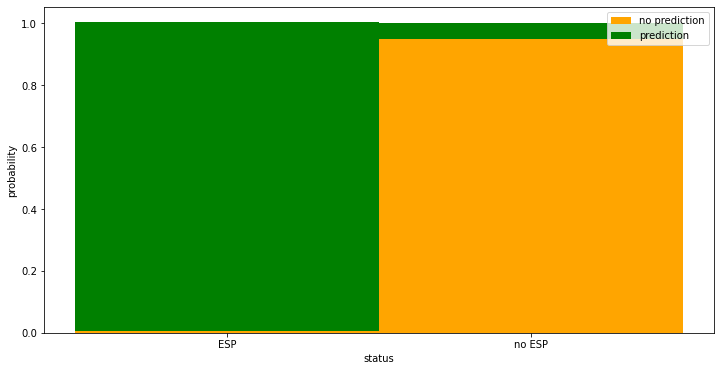

Priors: P(ESP), P(!ESP): 50.00%, 50.00%
Posteriors: P(ESP|pred.), P(!ESP|pred.): 95.23%, 4.77%


In [31]:
pe1, pnoe1=plot_esp(0.5, 0.5)


Conclusione: se *a priori* siamo pronti a credere nella possibilità che esistano ESP, basta un'evidenza forte per convincerci.

Se invece inzialmente siamo parecchio scettici:

* <span style="color: blue">*Extraordinary claims require extraordinary evidence* (ECREE, Carl Sagan)</span>

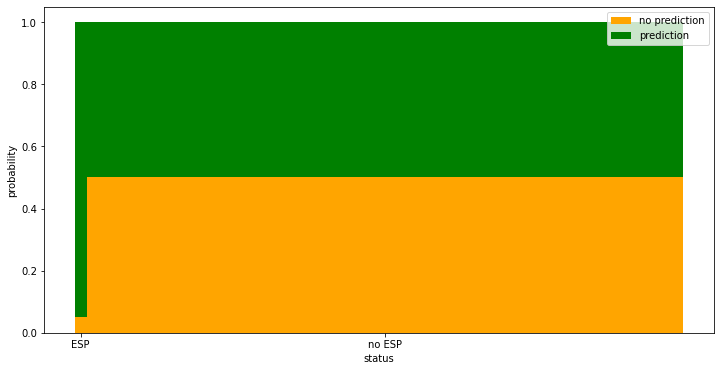

Priors: P(ESP), P(!ESP): 2.00%, 98.00%
Posteriors: P(ESP|pred.), P(!ESP|pred.): 3.73%, 96.27%


In [4]:
plot_esp(0.02, 0.98)

Conclusione: **non** basta un'evidenza forte per convincerci, se abbiamo un forte scetticismo. Ma magari siamo pronti a dare una seconda chance e verificare meglio.

*Non sempre si sa cosa dire, non sempre si ha una spiegazione ovvia e pronta da spiattellare in faccia al credulone di turno, MA - e questo è importante - il fatto che non si sappia trovare una spiegazione non significa che non ci sia una spiegazione.*

<span style="margin-left: 30px">dal <a href="https://smarcell1961.blogspot.com/2017/05/citta-aliene-sotto-il-mare-no-ma-la.html">Blog di Stefano Marcellini</a></span>

Inseriamo una terza possiblità: <span style="color: red">il presunto paragnosta **sta barando**!</span>

In [5]:
p_1_cheat, p_0_cheat=(0.98,0.02) 

def plot_esp_cheat(p_esp, p_noesp, p_cheat):
    plt.figure(figsize=(12,6))
    width=(p_esp, p_noesp, p_cheat)
    pos=(0, (p_esp+p_noesp)/2, (p_esp+p_cheat)/2+p_noesp)
    plt.bar(x=pos, height=(p_0_esp, p_0_noesp, p_0_cheat), width=width, label='no prediction', color='orange')
    plt.bar(x=pos, bottom=(p_0_esp, p_0_noesp, p_0_cheat), height=(p_1_esp, p_1_noesp, p_1_cheat), width=width, label='prediction', color='green')
    plt.xticks(pos, ['ESP','no ESP', 'cheat'])
    plt.legend(loc='upper right')
    plt.xlabel('status')
    plt.ylabel('probability')
    plt.show()
    print("Priors: P(ESP), P(!ESP), P(cheat): {:.2%}, {:.2%}, {:.2%}".format(p_esp, p_noesp, p_cheat))
    norm_1 = p_1_esp*p_esp+p_1_noesp*p_noesp+p_1_cheat*p_cheat
    p_esp_1 = p_1_esp * p_esp / norm_1
    p_noesp_1 = p_1_noesp * p_noesp / norm_1
    p_cheat_1 = p_1_cheat * p_cheat / norm_1
    print("Posteriors: P(ESP|pred.), P(!ESP|pred.), P(cheat|pred): {:.2%}, {:.2%}, {:.2%}".format(p_esp_1, p_noesp_1, p_cheat_1))

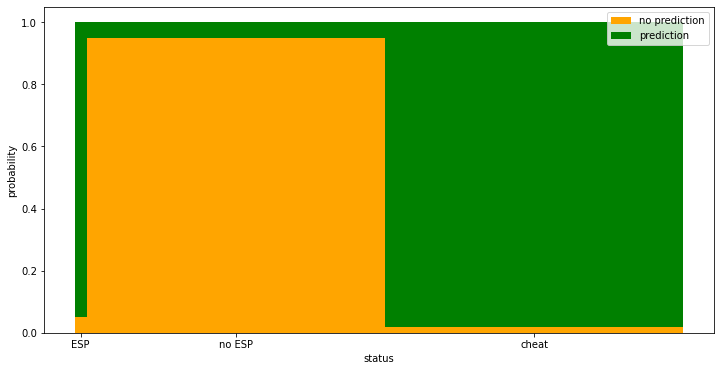

Priors: P(ESP), P(!ESP), P(cheat): 2.00%, 49.00%, 49.00%
Posteriors: P(ESP|pred.), P(!ESP|pred.), P(cheat|pred): 3.63%, 4.68%, 91.69%


In [6]:
plot_esp_cheat(0.02, 0.49, 0.49)

Conclusione: più che avere la menta *aperta* verso la possibilità del paranormale, è più ragionevole avere la mente aperta verso la possibilità che ci sia qualche imbroglio!

<span style="color: red">**Nota:** aggiungere una nuova ipotesi per giustificare poco credibile un'altra ipotesi che altrimenti sarebbe da considerare più probabile è esattamente l'approcci dei *complottisti*.<br>
    La differenza principale, però, tra l'approccio scettico razionale e quello complottista è che nel primo la *prior* si forma su un bagaglio culturale fondato su altre evidenze pregresse; nel secondo invece la *prior* si forma sulle opinioni di guru o influencer, e/o su notizie circolate su media poco affidabili.<br>
Come vedremo successivamente, l'approccio bayesiano consente di costruire una *prior* sulla scorta di evidenza pregressa ancora usando il teorema di bayes.</span>

## Terminologia

Nella definizione di probabilità nel senso bayesiano:

$\displaystyle P(A|E) = \frac{P(E|A) P(A)}{P(E)}$

I diversi termini hanno, come già visto più in generale, una loro nomenclatura:
* $P(A|E)$ è la *probabilità a posteriori*
* $P(E|A)$ è la *verosimiglianza*
* $P(A)$ è la *probabilità a priori*
* $P(E)$ viene detta *probabilità marginale* o *evidenza*

## Probabilità Bayesiana e metodo scientifico

L'approccio Bayesiano alla probabilità rappresenta un modello del funzionamento del metodo scientifico.

A priori possiamo fare delle ipotesi, alle quali inizialmente diamo una certa credibilità.

Successivamente, le osservazioni sperimentali modificheranno la credibilità delle varie ipotesi, fino a che una ipotesi non prevarrà nettamente sulle altre.

L'insorgere di nuove ipotesi può successivamente fare prevalere queste ultime alla luce di nuove evidenze sperimentali.

Questo è il senso della **verità scientifica**, che non è mai assoluta, ma che si basa sul bagaglio delle conoscenze acquisito dall'umanità ad un certo momento storico.

Il progresso scientifico consiste nell'evoluzione della verità scientifica in base alle osservazioni sperimentali che devono essere guidate dalle conoscenze e devono avere come scopo la verifica o la confutazione di ipotesi alternative tra le quali vanno cercate le teorie che ci portino al superamento di quelle attuali.

Esempio:
* l'evidenza della caduta dei gravi e del moto dei pianeti rende plausibile (quindi: *vera*, in assenza di alternative altrettanto plausibili) la teoria della **gravitazione universale**.
* l'evidenza di deviazioni dalla teoria della gravitazione a seguito delle previsioni della relatività generale (moto di Mercurio, lenti gravitazionali, e ora onde gravitazionali e buchi neri) rende la *vera* la **relatività generale** e *falsa* (ossia: non valida in tutti gli ambiti, ma approssimazione della precedente) la gravitazione universale
* future evidenze potrebbero confutare la relatività generale, e magari favorire una teoria più avanzata della gravità quantistica, fino ad eventuali ulteriori evidenze.


## Dogmi

Immaginiamo che una persona abbia una fede cieca in una convinzione. Possiamo rappresentare questa situazione come segue nella definizione della *prior*:

$\displaystyle
P(A_i) = 
\left\{
\begin{array}{lll}
1 & \mathrm{se} & i = 0 \\
0 & \mathrm{se} & i \ne 0 
\end{array}
\right.$

Assumendo questo dimostreremo che risulta:

$P(A_i|E) = P(A_i)$ 

Infatti, secondo il teorema di Bayes:

$\displaystyle P(A_i|E) = \frac{P(E|A_i) P(A_i)}{P(E)}$

Se $i\ne 0$ abbiamo:

$\displaystyle P(A_i|E) = \frac{P(E|A_i) \times 0}{P(E)} = 0 = P(A_i)$

Invece, se $i=0$, abbiamo:

$\displaystyle P(A_0|E) = \frac{P(E|A_0) \times 1}{\sum_{i=j}^n P(E|A_j) P(A_j)} = \frac{P(E|A_0) \times 1}{P(E|A_0) \times 1} = 1 = P(A_0)$

Qualsiasi evidenza, quindi, non è in grado di modificare la probabilità a priori.

C'è chiaramente un problema da gestire nel caso in cui $P(E|A_0)=0$, che darebbe una forma indeterminata $0/0$, ma molto spesso le osservazioni sperimentali hanno qualche margine di incertezza. Mentre un dogma non ammette dubbi.

Esempi sono terrapiattismo, antivaccinismo, ecc.

<span style="color: red">Credere in dogmi che contrastano con le evidenze, quindi, impedisce il progresso della conoscenza basato sulle osserevazioni sperimentali.</span>

Le uniche credenze dogmatiche compatibili con il metodo scientifico, quindi, sono quelle che non fanno previsioni su quantità osservabili.

Il grafico seguente mostra cosa succede in caso di fede cieca nei poteri paranormali.

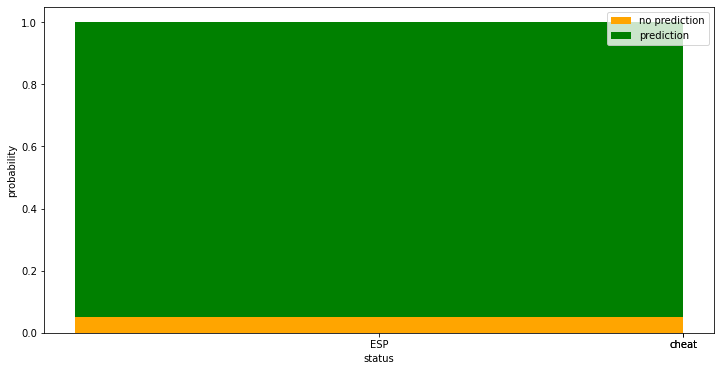

Priors: P(ESP), P(!ESP), P(cheat): 100.00%, 0.00%, 0.00%
Posteriors: P(ESP|pred.), P(!ESP|pred.), P(cheat|pred): 100.00%, 0.00%, 0.00%


In [7]:
plot_esp_cheat(1, 0, 0)

# Considerazioni

La probabilità definita in senso bayesiano si può applicare ad un numero di casi maggiore rispetto ad altri approcci.

Il prezzo da pagare è che bisogna introdurre una **probabilità a priori** che ha necessariamente carattere soggettivo.

Il calcolo della probabilità **a posteriori** dipenderà quindi in qualche modo da assunzioni soggettive.

Si può dimostrare, e sarà più chiaro in seguito, che più *forte* è l'evidenza, minore sarà la dipendenza del risultato finale dall'assunzione a priori soggettiva.

# Estensione del significato di probabilità ai parametri di una PDF

Se abbiamo una PDF che dipende da parametri, ad esempio $f(x; \theta)$, la formula del teorema di Bayes consente di estendere il significato di probabilità dalla variabile casuale $x$, dove può essere definito anche con altri approcci, al parametro $\theta$, dove, in senso frequentista, non si può parlare di probabilità.

Innanzitutto, spesso si preferisce usare la notazione $f(x|\theta)$, per indicare che la PDF è una distribuzione di probabilità *condizionata* dal fatto che il parametro abbia un certo valore $\theta$.

Quindi, come estendiamo il teorema di Bayes?

Ricordiamo che si scrive:

$\displaystyle P(A|E) = \frac{P(E|A) P(A)}{P(E)}$

Chiediamoci quali potrebbero essere gli equivalenti nel caso continuo.

#### Quali sono gli equivalenti dell'osservazione E e di A nel caso continuo ?

$ E \mapsto $ ??

$ A \mapsto $ ??

<details>

<summary> Risposta: </summary>

Possiamo identificare la nostra variabile continua $x$ come l'equivalente della quantità osservabile $E$, e il parametro, sempre con la potenza del continuo, $\theta$, come l'equivalente dell'ipotesi $A$:
    
$A \mapsto \theta\,\mathrm{d}\theta$

$E \mapsto x\,\mathrm{d}x$

</details>

#### E quale sarà l'equivalente di P(A|E)? 

Hint: dobbiamo ricordare che $f(x|\theta)$ non è la probaiblità, bensì una $\textit{densità}$ di probabilità! 
<details>

<summary>Risposta:</summary>
    
La probabilità sarà il prodotto della densità per la lunghezza dell'intervallo infinitesimo:

$\displaystyle P(E|A) \mapsto \mathrm{d}P(x|\theta) = f(x|\theta)\,\mathrm{d}x$

Caveat: questa è una probabilità infinitesima, andrà sempre integrata su un intervallo della variabile corrispondente per avere una quantità finita!
    
</details>


## Il teorema di bayes - caso variabile continua e parametri di una PDF:

Il teorema di Bayes si scrive dunque:

$\displaystyle f(\theta|x) = \frac{f(x|\theta)\,\pi(\theta)}{f(x)} $

Dove $\pi(\theta)$ e $f(x)$ sono i corrispondenti delle quantità P(A) e P(E). 

Esse sono la probabilità a priori di ottenere il parametro $\theta$ e la probabilità marginale della mia osservazione di $x$.

Ricordiamo anche la scomposizione del denominatore secondo la legge della probabilità totale nel caso discreto:

$\displaystyle P(A_i|E) = \frac{P(E|A_i) P(A_i)}{\sum_{j=1}^n P(E|A_j) P(A_j)}$

### Interpretazione per il parametro di una PDF

Se suddividiamo il dominio della PDF $f(x|\theta)$ in intervalli di ampiezza $\mathrm{d}\theta$, e ciascuno rappresenta un evento $A_i$ con probabilità $P(E|A_i)= f(x|\theta)\,\mathrm{d}x$, possiamo applicare la formulazione del teorema di Bayes appena ottenuta:

$\displaystyle f(\theta|x) = \frac{f(x|\theta)\,\pi(\theta)}{\int f(x|\theta^\prime)\,\pi(\theta^\prime)\,\mathrm{d}\theta^\prime}$

Dove:

$E \mapsto x$, $A_i \mapsto \theta$, $\sum_{j=1}^n\mapsto\int\mathrm{d}\theta^\prime$

$\displaystyle P(E|A_i) \mapsto \mathrm{d}P(x|\theta) = f(x|\theta)\,\mathrm{d}x$

$\displaystyle P(A_i|E) \mapsto \mathrm{d}P(\theta|x) = f(\theta|x)\,\mathrm{d}\theta$

$\displaystyle P(A_j|E) \mapsto \mathrm{d}P(\theta^\prime|x) = f(\theta^\prime|x)\,\mathrm{d}\theta^\prime$


$P(A_i)\mapsto \pi(\theta)\,\mathrm{d}\theta$

E quindi:

$\displaystyle f(\theta|x) \,\mathrm{d}\theta = \frac{
f(x|\theta)\,\mathrm{d}x\, \pi(\theta)\,\mathrm{d}\theta
}{
\int\, f(x|\theta^\prime)\,\mathrm{d}x\, \pi(\theta^\prime)\,\mathrm{d}\theta^\prime
}$

Da cui si ottiene:


$\displaystyle f(\theta|x) = \frac{f(x|\theta)\,\pi(\theta)}{\int f(x|\theta^\prime)\,\pi(\theta^\prime)\,\mathrm{d}\theta^\prime}$ 

### Esercizio 1
* Cosa accade se usiamo come prior la distribuzione ottenuta dopo la prima misura di ESP e ne facciamo una seconda che smentisce la predizione?

Hint: dobbiamo modificare la funzione aggiungendo cosa accade nel caso che potremmo dire "no pred" in cui si fallisce a prevedere l'esito!


In [109]:
# Dobbiamo scrivere la probabilità di ESP | no pred! 

# riportiamo qui quanto scritto prima, con notazione: 1 <-> E, 0 <-> !E
p_1_esp, p_0_esp = (0.95, 0.05)
p_1_noesp, p_0_noesp = (0.05, 0.95) 

def plot_esp(p_esp, p_noesp,pred=True,p_1_e=p_1_esp,p_0_e=p_0_esp,p_1_ne=p_1_noesp,p_0_ne=p_0_noesp, doPlot=True,verbose=True):
    if(doPlot):
        width=(p_esp, p_noesp)
        pos=(0, (p_esp+p_noesp)/2)
        plt.figure(figsize=(12,6))
        plt.bar(x=pos, height=(p_0_esp, p_0_noesp), width=width, label='no prediction', color='orange')
        plt.bar(x=pos, bottom=(p_0_esp, p_0_noesp), height=(p_1_esp, p_1_noesp), width=width, label='prediction', color='green')
        plt.xticks(pos, ['ESP','no ESP'])
        plt.legend(loc='upper right')
        plt.xlabel('status')
        plt.ylabel('probability')
        plt.show()
    if(verbose):print("Priors: P(ESP), P(!ESP): {:.2%}, {:.2%}".format(p_esp, p_noesp))
    if pred:
        norm_1 = p_1_esp*p_esp+p_1_noesp*p_noesp
        p_esp_1 = p_1_esp * p_esp / norm_1
        p_noesp_1 = p_1_noesp * p_noesp / norm_1
        if(verbose):print("Posteriors: P(ESP|pred.), P(!ESP|pred.): {:.2%}, {:.2%}".format(p_esp_1, p_noesp_1))
        return (p_esp_1, p_noesp_1)
    if (not pred):
        norm_0 = p_0_esp*p_esp+p_0_noesp*p_noesp
        p_esp_0 = p_0_esp * p_esp / norm_0
        p_noesp_0 = p_0_ne * p_noesp / norm_0
        if(verbose):print("Posteriors: P(ESP|!pred.), P(!ESP|!pred.): {:.2%}, {:.2%}".format(p_esp_0, p_noesp_0))
        return (p_esp_0, p_noesp_0)

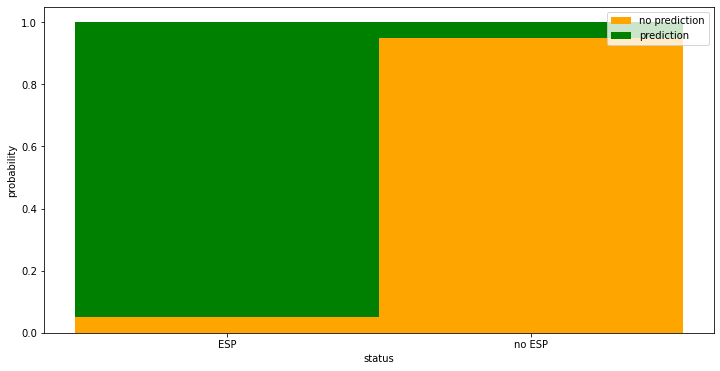

Priors: P(ESP), P(!ESP): 50.00%, 50.00%
Posteriors: P(ESP|pred.), P(!ESP|pred.): 95.00%, 5.00%


In [110]:
#Facciamo la prima misura, con prior "agnostica", da come risultato 1
pe_1, pnoe_1=plot_esp(p_esp=0.5,p_noesp= 0.5, pred=True)

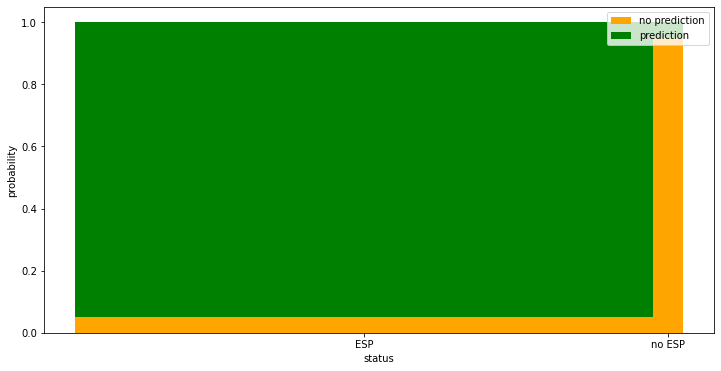

Priors: P(ESP), P(!ESP): 95.00%, 5.00%
Posteriors: P(ESP|!pred.), P(!ESP|!pred.): 50.00%, 50.00%


(0.5, 0.5)

In [111]:
#Facciamo la seconda misura, prendendo come prior quella della misura precedente. Stavolta otteniamo un risultato false:
plot_esp(p_esp=pe_1,p_noesp= pnoe_1, pred=False)

## Considerazioni

Mantenendo una condizione agnostica, una seconda misura che ha smentito il primo risultato ci ha permesso di ritornare ad una condizione di parità nella nostra posterior. Questo è sintomo di un feedback positivo, che in ultima istanza ci porterà nella direzione della distribuzione preferita dai dati.

A prescindere dalle nostre convinzioni, la risposta corretta è soltanto quella che proviene dai dati. La statistica deve fornirci solo un modo di interpetarli e fare delle affermazioni coerenti con quello che vediamo.

Nota importante: questo risultato dipende dal fatto che la distribuzione di probabilità condizionata è perfettamente simmetrica nelle due ipotesi. Ciònonostante, dimostra come naturalmente il 

### Esercizio 2

* Come possiamo fare a tenere in conto entrambe le misure simultaneamente? 

Hint: la nostra prior sarà di nuovo 50/50, perchè non abbiamo ancora fatto misure, ma dobbiamo scrivere la probabilità condizionata di tutti i casi possibili

## Cella spoiler protection!

&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  


## Fine spoiler protection





In [112]:
# Dobbiamo scrivere la probabilità di due misure indipendenti di ESP pred e no pred! 

print("Conditional probabilities are: \n  P( pred | ESP), P( pred | !ESP ): {:.2%}, {:.2%}".format(p_1_esp, p_1_noesp))
print("  P( no pred | ESP), P( no pred | !ESP ): {:.2%}, {:.2%}".format(p_0_esp, p_0_noesp))

#In questo caso dobbiamo considerare le diverse combinazioni:
p_10_esp, p_10_noesp = (2*p_1_esp*p_0_esp,2*p_1_noesp*p_0_noesp)
p_11_esp, p_11_noesp = (p_1_esp*p_1_esp,p_1_noesp*p_1_noesp)
p_00_esp, p_00_noesp = (p_0_esp*p_0_esp,p_0_noesp*p_0_noesp)

print("Joint conditional probabilities are: \n P( no pred. | ESP), P( no pred. | !ESP ): {:.2%}, {:.2%}".format(p_00_esp, p_00_noesp))
print("  P( one pred. | ESP), P( one pred. | !ESP ): {:.2%}, {:.2%}".format(p_10_esp, p_10_noesp))
print("  P( two pred. | ESP), P( two pred. | !ESP ): {:.2%}, {:.2%}".format(p_11_esp, p_11_noesp))

Conditional probabilities are: 
  P( pred | ESP), P( pred | !ESP ): 95.00%, 5.00%
  P( no pred | ESP), P( no pred | !ESP ): 5.00%, 95.00%
Joint conditional probabilities are: 
 P( no pred. | ESP), P( no pred. | !ESP ): 0.25%, 90.25%
  P( one pred. | ESP), P( one pred. | !ESP ): 9.50%, 9.50%
  P( two pred. | ESP), P( two pred. | !ESP ): 90.25%, 0.25%


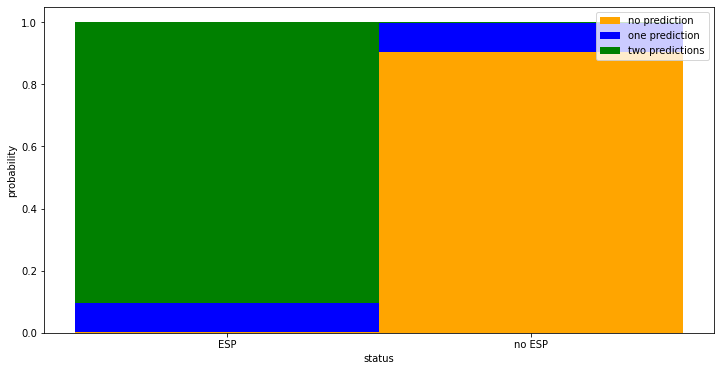

Priors: P(ESP), P(!ESP): 50.00%, 50.00%
Posteriors: P(ESP| one pred.), P(!ESP| one pred.): 50.00%, 50.00%


In [113]:
def plot_esp_two(p_esp, p_noesp,n_pred=1,doPlot=True):
    plt.figure(figsize=(12,6))
    width=(p_esp, p_noesp)
    pos=(0, (p_esp+p_noesp)/2)
    plt.bar(x=pos, height=(p_00_esp, p_00_noesp), width=width, label='no prediction', color='orange')
    plt.bar(x=pos, bottom=(p_00_esp, p_00_noesp), height=(p_10_esp, p_10_noesp), width=width, label='one prediction', color='blue')
    plt.bar(x=pos, bottom=(p_10_esp+p_00_esp, p_10_noesp+p_00_noesp), height=(p_11_esp, p_11_noesp), width=width, label='two predictions', color='green')
    plt.xticks(pos, ['ESP','no ESP'])
    plt.legend(loc='upper right')
    plt.xlabel('status')
    plt.ylabel('probability')
    if(doPlot):plt.show()
    print("Priors: P(ESP), P(!ESP): {:.2%}, {:.2%}".format(p_esp, p_noesp))
    if n_pred==0:
        norm_00 = p_00_esp*p_esp+p_00_noesp*p_noesp
        p_esp_00 = p_00_esp * p_esp / norm_00
        p_noesp_00 = p_00_noesp * p_noesp / norm_00
        print("Posteriors: P(ESP| no pred.), P(!ESP| no pred.): {:.2%}, {:.2%}".format(p_esp_00, p_noesp_00))
    if n_pred==1:
        norm_10 = p_10_esp*p_esp+p_10_noesp*p_noesp
        p_esp_10 = p_10_esp * p_esp / norm_10
        p_noesp_10 = p_10_noesp * p_noesp / norm_10
        print("Posteriors: P(ESP| one pred.), P(!ESP| one pred.): {:.2%}, {:.2%}".format(p_esp_10, p_noesp_10))
    if n_pred==2:
        norm_11 = p_11_esp*p_esp+p_11_noesp*p_noesp
        p_esp_11 = p_11_esp * p_esp / norm_11
        p_noesp_11 = p_11_noesp * p_noesp / norm_11
        print("Posteriors: P(ESP| one pred.), P(!ESP| one pred.): {:.2%}, {:.2%}".format(p_esp_11, p_noesp_11))

plot_esp_two(0.5,0.5,n_pred=1)

## Proviamo con valori diversi della prior:


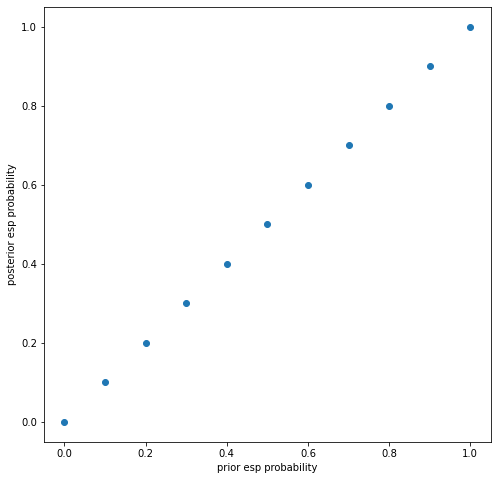

In [124]:
import numpy as np
prior_probs=[(x,1-x) for x in (np.linspace(0,1,11).tolist())]
prior_e = ()
posterior_e=()

p_1_esp, p_0_esp = (0.95, 0.05)
p_1_noesp, p_0_noesp = (0.05, 0.95) 


for p in prior_probs:
    p_e_i,p_ne_i=plot_esp(p_esp=p[0],p_noesp=p[1],pred=True, doPlot=False, verbose=False)
    post_e_i,post_ne_i=plot_esp(p_esp=p_e_i,p_noesp=p_ne_i,pred=False,doPlot=False,verbose=False)
    prior_e += (p[0],)
    posterior_e += (post_e_i,)

plt.figure(figsize=(8,8))
plt.xlabel('prior esp probability')
plt.ylabel('posterior esp probability')
plt.scatter(prior_e,posterior_e)
plt.show()

## Se cambia l'affidabilità del metodo cosa succederà alla mia previsione?

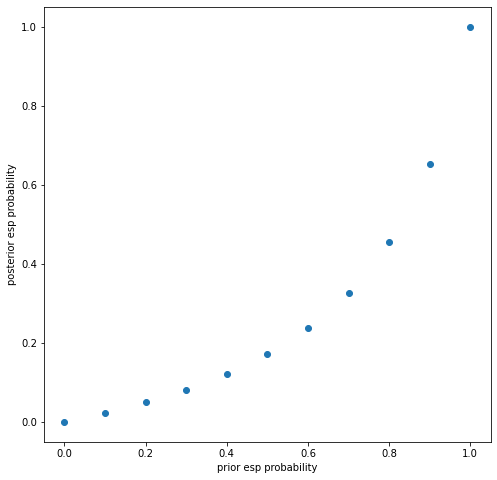

In [125]:
prior_e = ()
posterior_e=()

p_1_esp, p_0_esp = (0.99, 0.01)
p_1_noesp, p_0_noesp = (0.05, 0.95) 


for p in prior_probs:
    p_e_i,p_ne_i=plot_esp(p_esp=p[0],p_noesp=p[1],pred=True, doPlot=False, verbose=False)
    post_e_i,post_ne_i=plot_esp(p_esp=p_e_i,p_noesp=p_ne_i,pred=False,doPlot=False,verbose=False)
    prior_e += (p[0],)
    posterior_e += (post_e_i,)

plt.figure(figsize=(8,8))
plt.xlabel('prior esp probability')
plt.ylabel('posterior esp probability')
plt.scatter(prior_e,posterior_e)
plt.show()